In [44]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [45]:
url = "https://webgia.com/gia-vang/sjc/bieu-do-6-thang.html"

In [46]:
data = requests.get(url)

In [47]:
soup2 = BeautifulSoup(data.content)

Data that we need to check is inside <\script>

In [48]:
soup3 = soup2.body.find_all('script')

In [49]:
len(soup3)

11

Data that we need is in the index 10

In [50]:
type(soup3[10])

bs4.element.Tag

In [51]:
soup4 = soup3[10].contents

In [52]:
len(soup4[0])

9085

Filtering necessary data

In [53]:
import re

change list to string

In [54]:
soup4 = soup4[0]

getting search pattern and get the wanted values

In [55]:
pattern = re.compile(r"\:\[.*?\]]")
matches = pattern.findall(soup4)

In [56]:
for number,match in enumerate(matches):
    if number == 0:
        sell_price = match[1:]
    if number == 1:
        buy_price = match[1:]

Transform into DataFrame

In [57]:
sell_df = pd.DataFrame(eval(sell_price), columns = ['TimeStamp','Price'])

In [58]:
sell_df.shape
sell_df.head()

,TimeStamp,Price
0,1649955600000,69.85
1,1650042000000,69.60
2,1650128400000,69.80
3,1650301200000,69.95
4,1650387600000,70.55


In [59]:
buy_df = pd.DataFrame(eval(buy_price), columns = ['TimeStamp','Price'])

In [60]:
buy_df.shape
buy_df.head()

,TimeStamp,Price
0,1649955600000,69.25
1,1650042000000,69.00
2,1650128400000,69.15
3,1650301200000,69.35
4,1650387600000,69.75


TimeStamp column is in unixcode (by milisecond), so we divive to 1000 to change it to second, then transform to datetime

In [61]:
from datetime import datetime

In [62]:
sell_df['TimeStamp'] = sell_df['TimeStamp'].apply(lambda x: datetime.fromtimestamp(int(x)/1000).strftime('%Y-%m-%d'))

In [63]:
buy_df['TimeStamp'] = buy_df['TimeStamp'].apply(lambda x: datetime.fromtimestamp(int(x)/1000).strftime('%Y-%m-%d'))

In [64]:
sell_df.dtypes
buy_df.dtypes

TimeStamp     object
Price        float64
dtype: object

the type is Object so we change it to datetime type

In [65]:
sell_df['TimeStamp'] = pd.to_datetime(sell_df['TimeStamp'],format="%Y-%m-%d")
buy_df['TimeStamp'] = pd.to_datetime(buy_df['TimeStamp'],format="%Y-%m-%d")

In [66]:
sell_df.dtypes
buy_df.dtypes

TimeStamp    datetime64[ns]
Price               float64
dtype: object

plot by month

<AxesSubplot:xlabel='TimeStamp'>

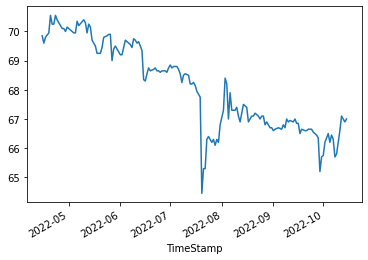

In [67]:
sell_df.groupby('TimeStamp')['Price'].sum().plot()

<AxesSubplot:xlabel='TimeStamp'>

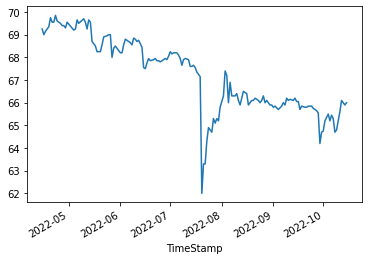

In [68]:
buy_df.groupby('TimeStamp')['Price'].sum().plot()

It hardly to see the data this way, so we try to use matplotlib library

In [69]:
import matplotlib.pyplot as plt

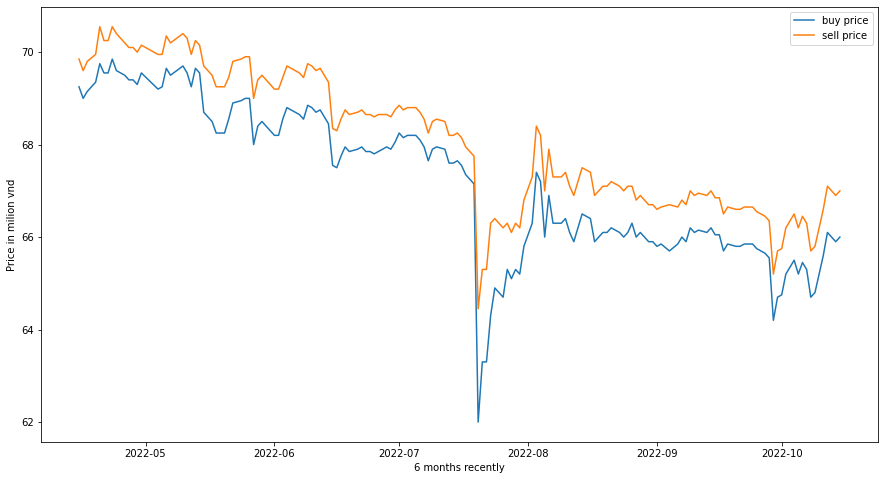

In [70]:
width = 15
height = 8
plt.figure(figsize=(width, height))
plt.plot(buy_df.groupby('TimeStamp')['Price'].sum(), label = 'buy price')
plt.plot(sell_df.groupby('TimeStamp')['Price'].sum(), label = 'sell price')
plt.xlabel('6 months recently')
plt.ylabel('Price in milion vnd')
plt.legend()
plt.show()

In [71]:
sell_df[sell_df.Price == sell_df['Price'].min()]

,TimeStamp,Price
79,2022-07-20,64.45


In [72]:
buy_df[buy_df.Price == buy_df['Price'].max()]

,TimeStamp,Price
7,2022-04-23,69.85


As you can see, the good time to buy gold is July/20th where price is at 64.45 and good time to sell is April/23th where price is at 69.85

Next, we gonna try to look more into this data set.
Create columns that contains the number of day in month and day of week.

In [73]:
sell_df['f_day'] = sell_df['TimeStamp'].dt.day
buy_df['f_day'] = buy_df['TimeStamp'].dt.day

In [74]:
sell_df['f_weekday'] = sell_df['TimeStamp'].dt.weekday
buy_df['f_weekday'] = buy_df['TimeStamp'].dt.weekday

In [75]:
sell_df.dtypes

TimeStamp    datetime64[ns]
Price               float64
f_day                 int64
f_weekday             int64
dtype: object

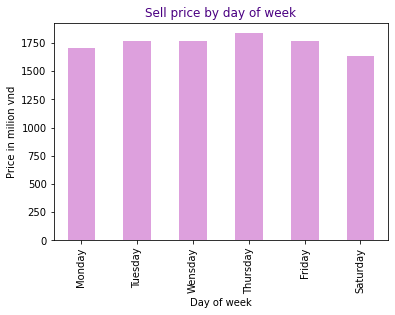

In [76]:
sell_df.groupby('f_weekday')['Price'].sum().plot.bar(color='plum')
plt.ylabel('Price in milion vnd')
plt.xlabel('Day of week')
plt.title('Sell price by day of week', color='indigo')
bars=('Monday','Tuesday','Wensday','Thursday','Friday','Saturday')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.show()

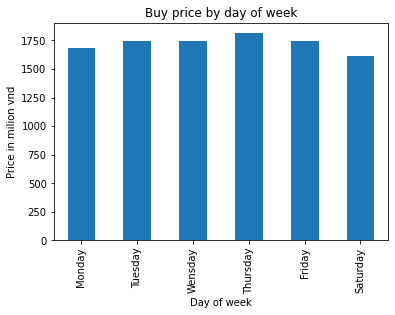

In [77]:
buy_df.groupby('f_weekday')['Price'].sum().plot.bar()
plt.ylabel('Price in milion vnd')
plt.xlabel('Day of week')
plt.title('Buy price by day of week')
bars=('Monday','Tuesday','Wensday','Thursday','Friday','Saturday')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.show()

So the gold price tend to decrease on Saturday

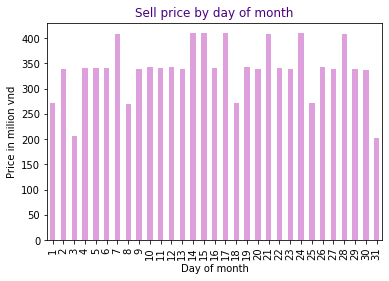

In [78]:
sell_df.groupby('f_day')['Price'].sum().plot.bar(color='plum')
plt.ylabel('Price in milion vnd')
plt.xlabel('Day of month')
plt.title('Sell price by day of month', color='indigo')
plt.show()

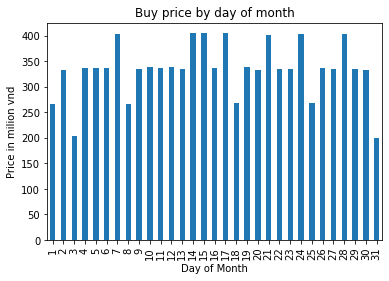

In [79]:
buy_df.groupby('f_day')['Price'].sum().plot.bar()
plt.ylabel('Price in milion vnd')
plt.xlabel('Day of Month')
plt.title('Buy price by day of month')
plt.show()

The gold price tend to increase in the day that are a multiple of 7, in the histogram we have 7th-14th-21th-28th

Save both dataframe to csv file

In [80]:
sell_df.to_csv('sell_df.csv')
buy_df.to_csv('buy_df.csv')